--- VISTA PREVIA DEL DATASET ---
       Fecha   Categoria  Precio_Unitario  Cantidad_Vendida  Region  \
0 2025-04-13  Pantalones          1412.55                 7  Centro   
1 2026-03-12  Accesorios          1325.88                 1    Este   
2 2025-12-15  Accesorios           258.78                 7     Sur   
3 2025-09-28  Pantalones           234.28                 5   Norte   
4 2025-04-17  Pantalones           689.40                 6     Sur   

   Calificacion_Cliente  Total_Venta  
0                     4      9887.85  
1                     3      1325.88  
2                     4      1811.46  
3                     1      1171.40  
4                     4      4136.40  

--- INFORMACIÓN DEL DATASET ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Fecha                 500 non-null    datetime64

/tmp/ipython-input-1349154435.py:66: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=ventas_por_cat, x='Categoria', y='Total_Venta', palette='viridis')


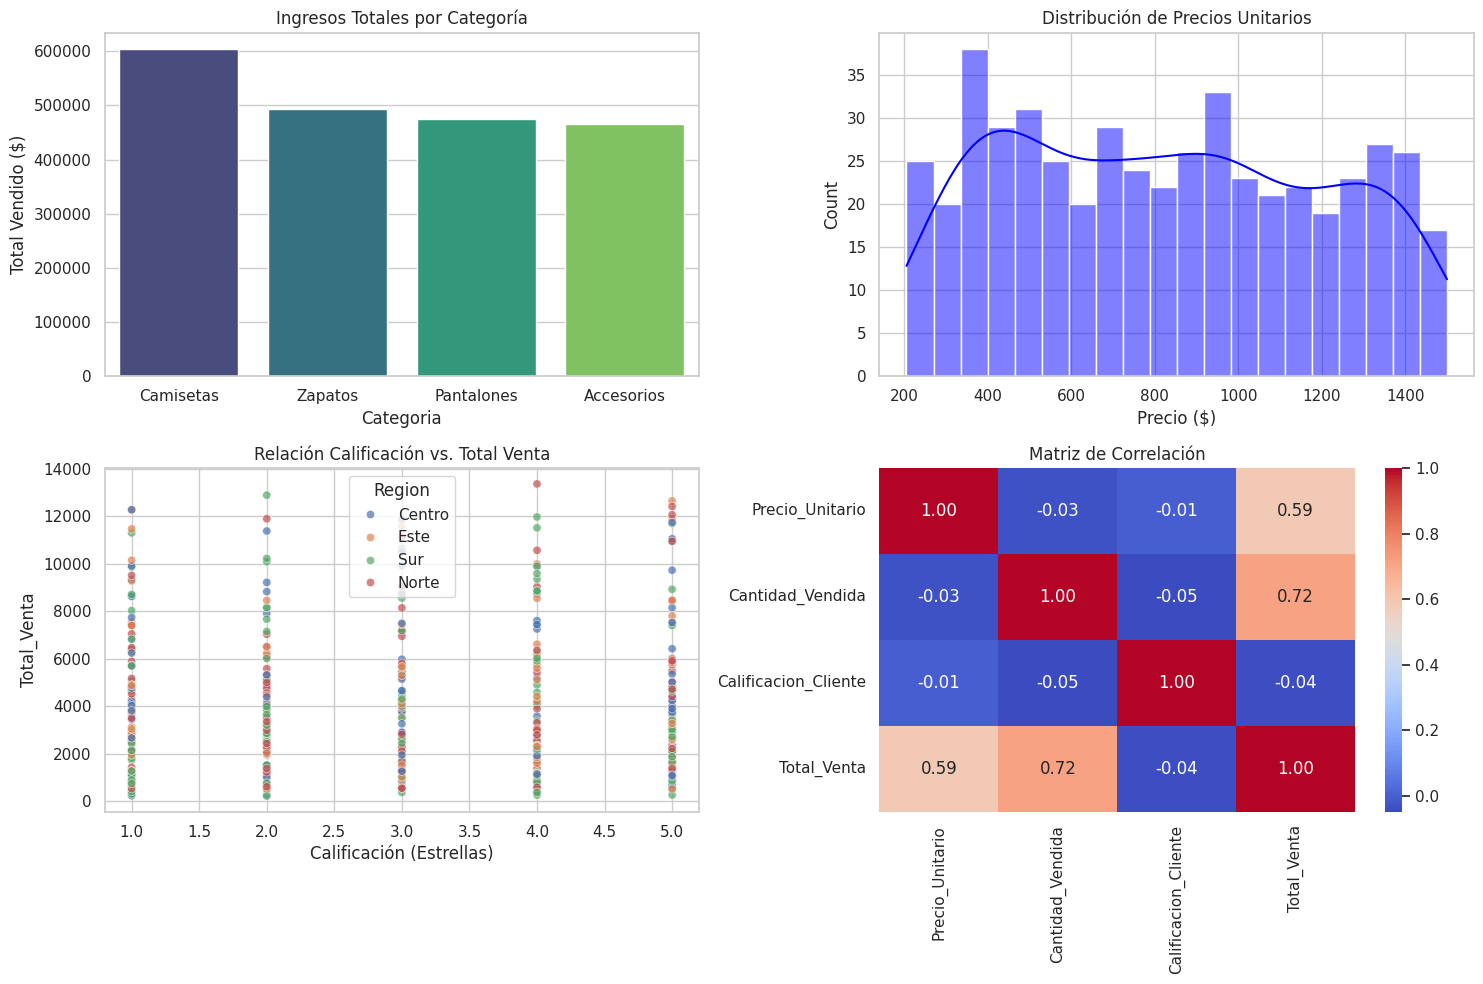

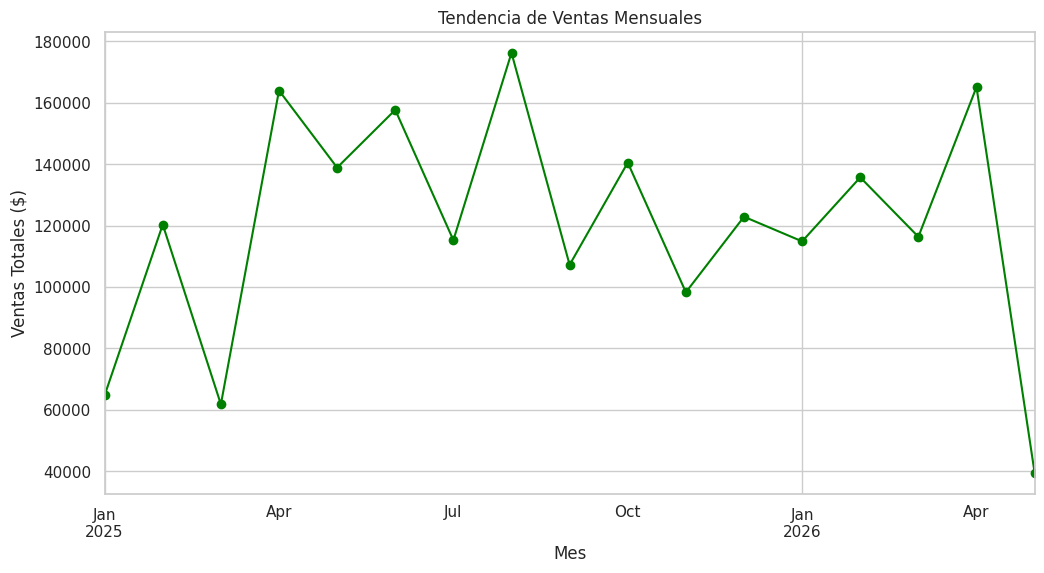


--- CONCLUSIONES PARA TOMA DE DECISIONES ---
1. El producto estrella es 'Camisetas' con ventas de $603,702.33.
2. La categoría con menor desempeño es 'Accesorios'.
3. Se observa en el histograma que la mayoría de los productos vendidos están en el rango de $200 a $800.
4. La correlación muestra que precios más altos no necesariamente garantizan mejores calificaciones.


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from math import sqrt

np.random.seed(42)

n_registros = 500
fechas = pd.date_range(start='2025-01-01', periods=n_registros, freq='D')
categorias = ['Camisetas', 'Pantalones', 'Accesorios', 'Zapatos']
regiones = ['Norte', 'Sur', 'Centro', 'Este']

data = {
    'Fecha': np.random.choice(fechas, n_registros),
    'Categoria': np.random.choice(categorias, n_registros),
    'Precio_Unitario': np.random.uniform(200, 1500, n_registros).round(2),
    'Cantidad_Vendida': np.random.randint(1, 10, n_registros),
    'Region': np.random.choice(regiones, n_registros),
    'Calificacion_Cliente': np.random.randint(1, 6, n_registros)
}

df = pd.DataFrame(data)

df['Total_Venta'] = df['Precio_Unitario'] * df['Cantidad_Vendida']


print("--- VISTA PREVIA DEL DATASET ---")
print(df.head())
print("\n--- INFORMACIÓN DEL DATASET ---")
print(df.info())
print("\n--- ESTADÍSTICAS DESCRIPTIVAS ---")
print(df.describe())


promedio_ventas = df['Total_Venta'].mean()
varianza = sum((x - promedio_ventas) ** 2 for x in df['Total_Venta']) / len(df)
desviacion_estandar_manual = sqrt(varianza)
print(f"\nDesviación estándar calculada con math.sqrt: {desviacion_estandar_manual:.2f}")

sns.set_theme(style="whitegrid")
plt.figure(figsize=(15, 10))

# GRÁFICO 1 Ventas Totales por Categoría
plt.subplot(2, 2, 1)
ventas_por_cat = df.groupby('Categoria')['Total_Venta'].sum().sort_values(ascending=False).reset_index()
sns.barplot(data=ventas_por_cat, x='Categoria', y='Total_Venta', palette='viridis')
plt.title('Ingresos Totales por Categoría')
plt.ylabel('Total Vendido ($)')

# GRÁFICO 2 Histograma
plt.subplot(2, 2, 2)
sns.histplot(df['Precio_Unitario'], bins=20, kde=True, color='blue')
plt.title('Distribución de Precios Unitarios')
plt.xlabel('Precio ($)')

# GRÁFICO 3 Relación entre Calificación y Ventas
plt.subplot(2, 2, 3)
sns.scatterplot(data=df, x='Calificacion_Cliente', y='Total_Venta', hue='Region', alpha=0.7)
plt.title('Relación Calificación vs. Total Venta')
plt.xlabel('Calificación (Estrellas)')

# GRÁFICO 4 Mapa de Calor
plt.subplot(2, 2, 4)
cols_numericas = df.select_dtypes(include=[np.number])
matriz_corr = cols_numericas.corr()
sns.heatmap(matriz_corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación')

plt.tight_layout()
plt.show()


plt.figure(figsize=(12, 6))
df_sorted = df.sort_values('Fecha')
df_sorted['Mes'] = df_sorted['Fecha'].dt.to_period('M')
ventas_mensuales = df_sorted.groupby('Mes')['Total_Venta'].sum()

ventas_mensuales.plot(kind='line', marker='o', color='green')
plt.title('Tendencia de Ventas Mensuales')
plt.xlabel('Mes')
plt.ylabel('Ventas Totales ($)')
plt.grid(True)
plt.show()


# aqui estas las conclusiones

mejor_categoria = ventas_por_cat.iloc[0]['Categoria']
total_mejor = ventas_por_cat.iloc[0]['Total_Venta']
peor_categoria = ventas_por_cat.iloc[-1]['Categoria']

print("\n--- CONCLUSIONES PARA TOMA DE DECISIONES ---")
print(f"1. El producto estrella es '{mejor_categoria}' con ventas de ${total_mejor:,.2f}.")
print(f"2. La categoría con menor desempeño es '{peor_categoria}'.")
print("3. Se observa en el histograma que la mayoría de los productos vendidos están en el rango de $200 a $800.")
print("4. La correlación muestra que precios más altos no necesariamente garantizan mejores calificaciones.")